## Сетевое программирование в Python

- сокеты
- CGI
- requests + BeautifulSoup
- aiohttp
- websockets
- flask
- scrapy

### Сокеты

Напишем код для простейшего обмена данными (серверную и клиентскую часть):

In [1]:
with open('script/socket_server.py', 'rt') as f:
    print(f.read())


import socket
import time

# create a socket object
serversocket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# get local machine name
host = socket.gethostname()

port = 9999

# bind to the port
serversocket.bind((host, port))

# queue up to 5 requests
serversocket.listen(5)

while True:
    # establish a connection
    clientsocket,addr = serversocket.accept()

    print("Got a connection from %s" % str(addr))
    currentTime = time.ctime(time.time()) + "\r\n"
    clientsocket.send(currentTime.encode('ascii'))
    clientsocket.close()



In [2]:
with open('script/socket_client.py', 'rt') as f:
    print(f.read())


import socket

HOST = socket.gethostname()    
PORT = 9999

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((HOST, PORT))
sock.sendall(b'Hello, world')

data = sock.recv(1024)

sock.close()

print('Received', repr(data))



In [3]:
# Запускаем:

# > python socket_server.py
# > python socket_client.py

# ответ на клиенте будет в виде:
# Received b'Tue May  4 23:17:19 2021\r\n'


In [4]:
print('Пример эхо-сервера:')
print()
print('===')

with open('script/echo_server.py', 'rt') as f:
    print(f.read())

Пример эхо-сервера:

===
import socket

HOST = ''        # Symbolic name meaning all available interfaces
PORT = 9999

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

sock.bind((HOST, PORT))
sock.listen(1)
conn, addr = sock.accept()

print('Connected by', addr)

while True:
    data = conn.recv(1024)
    #if not data: break
    if data:
        conn.sendall(data + b' from server!')

conn.close()



In [5]:
# Запускаем:

# > python socket_server.py
# > python socket_client.py

# ответ на клиенте будет в виде:
# Received b'Hello, world from server!'


### CGI (Common Gateway Interface)

CGI является средством динамической генерации web-страниц. 

CGI-скрипты можно кодить на любом интерпретируемом или компилируемом языке программирования. 

Скрипты, которые будут далее в ячейках, помещаем в директорию **cgi-bin**.

Запускаем встроенный http-сервер (либо другой)

> <pre>python -m http.server --cgi</pre>


In [6]:
with open('script/cgi-bin/simple.py', 'rt', encoding='utf8') as f:
    print(f.read())


print("Content-type: text/html")
print()
print("<h1>Привет</h1>")
print("<h3>от <pre>localhost:8000/cgi-bin/simple.py</pre> ))</h3>")



---

Открываем в браузере url:

> <pre>localhost:8000/cgi-bin/simple.py</pre>


---

Далее рассмотрим пример с передачей данных формы.

Сделаем такую html-страницу:


In [7]:
with open('script/cgi.html', 'rt', encoding='utf8') as f:
    print(f.read())


<!DOCTYPE html>
<html>
<head>
<meta charset='utf-8'>
<title>Форма добавления автомобиля</title>
</head>
  <body>
    <form action='/cgi-bin/add_car.py'>
      Car: 
      <input type='text' name='car'>
      No: 
      <input type='text' name='no'>
      <input type='submit'>
  </form>
</body>
</html>



---

Открываем в браузере url:

> <pre>localhost:8000/cgi.html</pre>

Будет вызываться следующий скрипт:


In [8]:
with open('script/cgi-bin/add_car.py', 'rt', encoding='utf8') as f:
    print(f.read())


import cgi
import html


form = cgi.FieldStorage()
car = html.escape(form.getfirst('car', 'unknown'))
car_no = html.escape(form.getfirst('no', 'unknown'))

print('Content-type: text/html\n')
print('''<!DOCTYPE HTML>
        <html>
        <head>
            <title>Форма добавления автомобиля</title>
        </head>
        <body>''')

print('<h1>Ваши данные приняты!</h1>')
print('<p>Вы указали автомобиль: {}</p>'.format(car))
print('<p>С номером: {}</p>'.format(car_no))

print('''</body></html>''')



### Библиотека requests

In [9]:
import requests
from bs4 import BeautifulSoup

https://www.google.com/search?q=genesis%2Bfoxtrot%2Bdiscogs
<!doctype html><html lang="uk"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>genesis+foxtrot+discogs - &#1055;&#1086;&#1096;&#1091;&#1082; Google</title><script nonce="5qVaWAqyBYfiQivvrG9+SA==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){windo
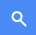

In [10]:
# будем смотреть HTTP-ответ на запрос "genesis foxtrot discogs" в Google

URL = 'https://www.google.com/search'

payload = {'q': 'genesis+foxtrot+discogs'}

response = requests.get(URL, params=payload)

print(response.url)
print(response.text[:10000])
print('...')


<!DOCTYPE html>
<html lang="uk">
 <head>
  <meta charset="utf-8"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   genesis+foxtrot+discogs - Пошук Google
  </title>
  <script nonce="5qVaWAqyBYfiQivvrG9+SA==">
   (function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now(
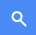

In [11]:
# выведем покрасивее; потихоньку начинаем использовать BeatifulSoup

soup = BeautifulSoup(response.text, 'html.parser')

print(soup.prettify()[:10000])

In [12]:
soup.find_all('a')


[<a href="/?sa=X&amp;ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQOwgC"><span class="V6gwVd">G</span><span class="iWkuvd">o</span><span class="cDrQ7">o</span><span class="V6gwVd">g</span><span class="ntlR9">l</span><span class="iWkuvd tJ3Myc">e</span></a>,
 <a class="l" href="/?output=search&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQPAgE"><span class="V6gwVd">G</span><span class="iWkuvd">o</span><span class="cDrQ7">o</span><span class="V6gwVd">g</span><span class="ntlR9">l</span><span class="iWkuvd tJ3Myc">e</span></a>,
 <a href="/search?q=genesis%2Bfoxtrot%2Bdiscogs&amp;ie=UTF-8&amp;gbv=1&amp;sei=W-KSYLfGOcKrrgTa7YrYBg">тут</a>,
 <a class="eZt8xd" href="/search?q=genesis%2Bfoxtrot%2Bdiscogs&amp;ie=UTF-8&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQ_AUICCgB">Зображення</a>,
 <a class="eZt8xd" href="/search?q=genesis%2Bfoxtrot%2Bdiscogs&amp;ie=UTF-8&amp;source=lnms&amp;tbm=vid&amp;sa=X&amp;ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQ_AUICSgC">Віде

In [13]:
# отберем только ссылки:

links = [link.get('href') for link in soup.find_all('a')]
links

['/?sa=X&ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQOwgC',
 '/?output=search&ie=UTF-8&sa=X&ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQPAgE',
 '/search?q=genesis%2Bfoxtrot%2Bdiscogs&ie=UTF-8&gbv=1&sei=W-KSYLfGOcKrrgTa7YrYBg',
 '/search?q=genesis%2Bfoxtrot%2Bdiscogs&ie=UTF-8&source=lnms&tbm=isch&sa=X&ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQ_AUICCgB',
 '/search?q=genesis%2Bfoxtrot%2Bdiscogs&ie=UTF-8&source=lnms&tbm=vid&sa=X&ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQ_AUICSgC',
 '/search?q=genesis%2Bfoxtrot%2Bdiscogs&ie=UTF-8&source=lnms&tbm=shop&sa=X&ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQ_AUICigD',
 'https://maps.google.com/maps?q=genesis%2Bfoxtrot%2Bdiscogs&um=1&ie=UTF-8&sa=X&ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQ_AUICygE',
 '/search?q=genesis%2Bfoxtrot%2Bdiscogs&ie=UTF-8&source=lnms&tbm=nws&sa=X&ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQ_AUIDCgF',
 '/search?q=genesis%2Bfoxtrot%2Bdiscogs&ie=UTF-8&source=lnms&tbm=bks&sa=X&ved=0ahUKEwj3392zlLPwAhXClYsKHdq2AmsQ_AUIDSgG',
 '/advanced_search',
 '/search?q=genesis%2Bfoxt

In [14]:
# а также только те ссылки, которые реально ведут на www.discogs.com

def post_process(link):
    return link[link.index('https:'):link.index('&')]


[post_process(l) for l in links if 'www.discogs.com' in l]


['https://www.discogs.com/ru/Genesis-Foxtrot/master/28853',
 'https://www.discogs.com/Genesis-Foxtrot/release/566797',
 'https://www.discogs.com/ru/Genesis-Foxtrot/release/5332522',
 'https://www.discogs.com/Genesis-Foxtrot/release/2061470',
 'https://www.discogs.com/Genesis-Foxtrot/release/1332980',
 'https://www.discogs.com/Genesis-Foxtrot/release/3344264',
 'https://www.discogs.com/ru/Genesis-Foxtrot/release/11600200']

---

Пример загрузки файла (по фрагментам)

In [15]:
URL = 'https://github.com/ar1st0crat/PythonCourse/raw/master/labs/Lab04%20-%20Python%20libraries.pdf'

r = requests.get(URL, stream=True)

with open('data/download.pdf', 'wb') as f:
    for chunk in r.iter_content(chunk_size=2**15):
        if chunk:
            f.write(chunk)
            print(f'Downloaded {2**15} bytes')


Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes
Downloaded 32768 bytes


### Библиотека aiohttp

Предоставляет возможности для асинхронного клиент-серверного взаимодействия (http, web sockets).


In [16]:
# !pip install aiohttp

import aiohttp
import asyncio
import time


In [17]:
# example taken from
# https://www.twilio.com/blog/asynchronous-http-requests-in-python-with-aiohttp

start_time = time.time()


async def get_pokemon(session, url):
    async with session.get(url) as resp:
        pokemon = await resp.json()
        return pokemon['name']


async def main():

    async with aiohttp.ClientSession() as session:

        tasks = []
        for number in range(1, 151):
            url = f'https://pokeapi.co/api/v2/pokemon/{number}'
            tasks.append(asyncio.ensure_future(get_pokemon(session, url)))

        original_pokemon = await asyncio.gather(*tasks)
        for pokemon in original_pokemon:
            print(pokemon)

# asyncio.run(main())

await main()

print("--- %s seconds ---" % (time.time() - start_time))


bulbasaur
ivysaur
venusaur
charmander
charmeleon
charizard
squirtle
wartortle
blastoise
caterpie
metapod
butterfree
weedle
kakuna
beedrill
pidgey
pidgeotto
pidgeot
rattata
raticate
spearow
fearow
ekans
arbok
pikachu
raichu
sandshrew
sandslash
nidoran-f
nidorina
nidoqueen
nidoran-m
nidorino
nidoking
clefairy
clefable
vulpix
ninetales
jigglypuff
wigglytuff
zubat
golbat
oddish
gloom
vileplume
paras
parasect
venonat
venomoth
diglett
dugtrio
meowth
persian
psyduck
golduck
mankey
primeape
growlithe
arcanine
poliwag
poliwhirl
poliwrath
abra
kadabra
alakazam
machop
machoke
machamp
bellsprout
weepinbell
victreebel
tentacool
tentacruel
geodude
graveler
golem
ponyta
rapidash
slowpoke
slowbro
magnemite
magneton
farfetchd
doduo
dodrio
seel
dewgong
grimer
muk
shellder
cloyster
gastly
haunter
gengar
onix
drowzee
hypno
krabby
kingler
voltorb
electrode
exeggcute
exeggutor
cubone
marowak
hitmonlee
hitmonchan
lickitung
koffing
weezing
rhyhorn
rhydon
chansey
tangela
kangaskhan
horsea
seadra
goldeen
seakin

In [18]:
# если бы делали это синхронно с помощью requests,
# это заняло бы гораздо больше времени:

start_time = time.time()

for number in range(1, 151):
    url = f'https://pokeapi.co/api/v2/pokemon/{number}'
    resp = requests.get(url)
    pokemon = resp.json()
    print(pokemon['name'])

print("--- %s seconds ---" % (time.time() - start_time))


bulbasaur
ivysaur
venusaur
charmander
charmeleon
charizard
squirtle
wartortle
blastoise
caterpie
metapod
butterfree
weedle
kakuna
beedrill
pidgey
pidgeotto
pidgeot
rattata
raticate
spearow
fearow
ekans
arbok
pikachu
raichu
sandshrew
sandslash
nidoran-f
nidorina
nidoqueen
nidoran-m
nidorino
nidoking
clefairy
clefable
vulpix
ninetales
jigglypuff
wigglytuff
zubat
golbat
oddish
gloom
vileplume
paras
parasect
venonat
venomoth
diglett
dugtrio
meowth
persian
psyduck
golduck
mankey
primeape
growlithe
arcanine
poliwag
poliwhirl
poliwrath
abra
kadabra
alakazam
machop
machoke
machamp
bellsprout
weepinbell
victreebel
tentacool
tentacruel
geodude
graveler
golem
ponyta
rapidash
slowpoke
slowbro
magnemite
magneton
farfetchd
doduo
dodrio
seel
dewgong
grimer
muk
shellder
cloyster
gastly
haunter
gengar
onix
drowzee
hypno
krabby
kingler
voltorb
electrode
exeggcute
exeggutor
cubone
marowak
hitmonlee
hitmonchan
lickitung
koffing
weezing
rhyhorn
rhydon
chansey
tangela
kangaskhan
horsea
seadra
goldeen
seakin

In [19]:
# можем также закинуть синхронные requests.get-ы
# в пул потоков

import concurrent.futures


async def main():

    with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:

        loop = asyncio.get_event_loop()
        futures = [
            loop.run_in_executor(
                executor, 
                requests.get, 
                f'https://pokeapi.co/api/v2/pokemon/{i}'
            )
            for i in range(1, 151)
        ]
        for response in await asyncio.gather(*futures):
            print(response.json()['name'])


loop = asyncio.get_event_loop()

start_time = time.time()

await main()
# loop.run_until_complete(main())

print("--- %s seconds ---" % (time.time() - start_time))


bulbasaur
ivysaur
venusaur
charmander
charmeleon
charizard
squirtle
wartortle
blastoise
caterpie
metapod
butterfree
weedle
kakuna
beedrill
pidgey
pidgeotto
pidgeot
rattata
raticate
spearow
fearow
ekans
arbok
pikachu
raichu
sandshrew
sandslash
nidoran-f
nidorina
nidoqueen
nidoran-m
nidorino
nidoking
clefairy
clefable
vulpix
ninetales
jigglypuff
wigglytuff
zubat
golbat
oddish
gloom
vileplume
paras
parasect
venonat
venomoth
diglett
dugtrio
meowth
persian
psyduck
golduck
mankey
primeape
growlithe
arcanine
poliwag
poliwhirl
poliwrath
abra
kadabra
alakazam
machop
machoke
machamp
bellsprout
weepinbell
victreebel
tentacool
tentacruel
geodude
graveler
golem
ponyta
rapidash
slowpoke
slowbro
magnemite
magneton
farfetchd
doduo
dodrio
seel
dewgong
grimer
muk
shellder
cloyster
gastly
haunter
gengar
onix
drowzee
hypno
krabby
kingler
voltorb
electrode
exeggcute
exeggutor
cubone
marowak
hitmonlee
hitmonchan
lickitung
koffing
weezing
rhyhorn
rhydon
chansey
tangela
kangaskhan
horsea
seadra
goldeen
seakin

### WebSockets

In [ ]:
# !pip install websockets

In [20]:
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter
import IPython

In [21]:

print('Пример кода сервера:')
print()
print('===')

with open('script/websocket_server.py', 'rt') as f:
    print(f.read())


Пример кода сервера:

===
import asyncio
import websockets


async def hello(websocket, path):
    name = await websocket.recv()
    print(f"< {name}")

    greeting = f"Hello {name}!"

    await websocket.send(greeting)
    print(f"> {greeting}")


start_server = websockets.serve(hello, "localhost", 8765)

asyncio.get_event_loop().run_until_complete(start_server)
asyncio.get_event_loop().run_forever()



In [22]:
# %pycat script/websocket_server.py

# покажем код по-модному, с подсветкой синтаксиса )))

print('Пример кода клиента:')
print()
print('===')

with open('script/websocket_client.py', 'rt') as f:
    code = f.read()
    
formatter = HtmlFormatter()
IPython.display.HTML('<style type="text/css">{}</style>{}'.format(
formatter.get_style_defs('.highlight'),
highlight(code, PythonLexer(), formatter)))


Пример кода клиента:

===


In [23]:
# Запускаем:

# python websocket_server.py
# python websocket_client.py

In [24]:
print('Пример кода сервера с общим состоянием для нескольких клиентов:')
print()
print('===')

with open('script/websocket_state.py', 'rt') as f:
    print(f.read())


Пример кода сервера с общим состоянием для нескольких клиентов:

===
import asyncio
import json
import logging
import websockets

logging.basicConfig()

STATE = {"value": 0}

USERS = set()


def state_event():
    return json.dumps({"type": "state", **STATE})


def users_event():
    return json.dumps({"type": "users", "count": len(USERS)})


async def notify_state():
    if USERS:  # asyncio.wait doesn't accept an empty list
        message = state_event()
        await asyncio.wait([user.send(message) for user in USERS])


async def notify_users():
    if USERS:  # asyncio.wait doesn't accept an empty list
        message = users_event()
        await asyncio.wait([user.send(message) for user in USERS])


async def register(websocket):
    USERS.add(websocket)
    await notify_users()


async def unregister(websocket):
    USERS.remove(websocket)
    await notify_users()


async def counter(websocket, path):
    # register(websocket) sends user_event() to websocket
    await register

---

Запускаем этот скрипт в консоли и открываем в браузере несколько файлов **websockets_demo.html**

In [25]:
with open('script/websockets_demo.html', 'rt') as f:
    code = f.read()
    
start = code.index('<script>') + len('<script>')
end = code.index('</script>')


print('Клиентский javascript-код:')
print()
print('===')

print(code[start:end])

Клиентский javascript-код:

===

            var minus = document.querySelector('.minus'),
                plus = document.querySelector('.plus'),
                value = document.querySelector('.value'),
                users = document.querySelector('.users'),
                websocket = new WebSocket("ws://127.0.0.1:6789/");
            minus.onclick = function (event) {
                websocket.send(JSON.stringify({action: 'minus'}));
            }
            plus.onclick = function (event) {
                websocket.send(JSON.stringify({action: 'plus'}));
            }
            websocket.onmessage = function (event) {
                data = JSON.parse(event.data);
                switch (data.type) {
                    case 'state':
                        value.textContent = data.value;
                        break;
                    case 'users':
                        users.textContent = (
                            data.count.toString() + " user" +
                

## flask

---

Сначала напишем простое web-серверное приложение с помощью только aiohttp:


In [26]:
with open('script/aiohttp_server.py', 'rt') as f:
    print(f.read())


from aiohttp import web
import jinja2
import aiohttp_jinja2


routes = web.RouteTableDef()


async def hello(request):
    return web.Response(text="Hello, world")


@routes.get('/wow')
async def wow(request):
    return web.Response(text="Wow")


@routes.get('/page')
@aiohttp_jinja2.template('page.html')
async def page(request):
    return { 'cars': [ { 'model': 'Toyota Lexus', 'no': 'A123AH' }, 
                       { 'model': 'Ford Focus', 'no': 'A765OO' } ] }


app = web.Application()
app.add_routes([web.get('/', hello)])
app.add_routes(routes)

aiohttp_jinja2.setup(app, loader=jinja2.FileSystemLoader('templates'))

web.run_app(app)



В браузере можно перейти по 3 адресам:

> localhost:8080

> localhost:8080/wow

> localhost:8080/page


---

Но в общем случае веб-приложения, конечно лучше писать на специализированных фреймворках (flask, django, etc.).

Ниже приводится код, аналогичный предыдущему, но на микрофеймворке flask.

"Микрофреймворк" означает, что сам по себе flask - без лишних заморочек.

Дополнительные фишки подтягиваются в виде его расширений.


In [27]:
with open('script/flask_demo.py', 'rt') as f:
    print(f.read())


from flask import Flask, render_template


app = Flask(__name__)


@app.route('/')
def hello_world():
    return 'Hello, world!'

@app.route('/wow')
def wow():
    return 'Wow'

@app.route('/page')
def page():
    cars = [ { 'model': 'Toyota Lexus', 'no': 'A123AH' }, 
             { 'model': 'Ford Focus', 'no': 'A765OO' } ]
    return render_template('page.html', cars=cars)



В командной строке прописываем и запускаем:

> export FLASK_APP=flask_demo.py

> flask run

И в бразуере заходим на 

> localhost:5000/page


Подробнее о микрофреймворке flask читаем здесь:

https://flask.palletsprojects.com/en/1.1.x/

Также в репозитории есть RESTFUL flask_example проект


## scrapy

Пока что на самостоятельное изучение ))

https://scrapy.org/